In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.preprocessing import standardize
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

In [179]:
df = pd.read_csv("Myocardial infarction complications Database.csv")

In [180]:
len(df)

1700

In [181]:
df.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
#create a dictionary feature name : number of nan
tot = []
for val in df.isnull().sum():
    tot.append(val)
nan = { k : v for k,v in zip(df.columns, tot)}
nan

{'ID': 0,
 'AGE': 8,
 'SEX': 0,
 'INF_ANAM': 4,
 'STENOK_AN': 106,
 'FK_STENOK': 73,
 'IBS_POST': 51,
 'IBS_NASL': 1628,
 'GB': 9,
 'SIM_GIPERT': 8,
 'DLIT_AG': 248,
 'ZSN_A': 54,
 'nr_11': 21,
 'nr_01': 21,
 'nr_02': 21,
 'nr_03': 21,
 'nr_04': 21,
 'nr_07': 21,
 'nr_08': 21,
 'np_01': 18,
 'np_04': 18,
 'np_05': 18,
 'np_07': 18,
 'np_08': 18,
 'np_09': 18,
 'np_10': 18,
 'endocr_01': 11,
 'endocr_02': 10,
 'endocr_03': 10,
 'zab_leg_01': 7,
 'zab_leg_02': 7,
 'zab_leg_03': 7,
 'zab_leg_04': 7,
 'zab_leg_06': 7,
 'S_AD_KBRIG': 1076,
 'D_AD_KBRIG': 1076,
 'S_AD_ORIT': 267,
 'D_AD_ORIT': 267,
 'O_L_POST': 12,
 'K_SH_POST': 15,
 'MP_TP_POST': 14,
 'SVT_POST': 12,
 'GT_POST': 12,
 'FIB_G_POST': 12,
 'ant_im': 83,
 'lat_im': 80,
 'inf_im': 80,
 'post_im': 72,
 'IM_PG_P': 1,
 'ritm_ecg_p_01': 152,
 'ritm_ecg_p_02': 152,
 'ritm_ecg_p_04': 152,
 'ritm_ecg_p_06': 152,
 'ritm_ecg_p_07': 152,
 'ritm_ecg_p_08': 152,
 'n_r_ecg_p_01': 115,
 'n_r_ecg_p_02': 115,
 'n_r_ecg_p_03': 115,
 'n_r_ecg_p_04

In [183]:
#total number of Nan
somma = 0 
for val in nan.values():
    somma = somma + val
somma

15974

In [184]:
#delete columns with too many nan
too_many_nan = ['IBS_NASL', 'D_AD_KBRIG', 'S_AD_KBRIG', 'KFK_BLOOD', 'NA_KB', 'NOT_NA_KB', 'LID_KB']
df = df.drop(columns = too_many_nan)

In [185]:
df.fillna(0, inplace = True)

Data Exploration

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 117 entries, ID to LET_IS
dtypes: float64(103), int64(14)
memory usage: 1.5 MB


In [187]:
#DATASET INFORMATIONS
#Columns 2-112 can be used as input data for prediction. 
#Possible complications (outputs) are listed in columns 113-124.
#
#There are four possible time moments for complication prediction: 
#on base of the information known at 
#
#1.	the time of admission to hospital: all input columns (2-112)
#except 93, 94, 95, 100, 101, 102, 103, 104, 105 can be used for prediction; 
#
#2.	the end of the first day (24 hours after admission to the hospital):
#all input columns (2-112) except 94, 95, 101, 102, 104, 105 can be used for prediction; 
#
#3.	the end of the second day (48 hours after admission to the hospital)
#all input columns (2-112) except 95, 102, 105 can be used for prediction; 
#
#4.	the end of the third day (72 hours after admission to the hospital)
#all input columns (2-112) can be used for prediction.

In [188]:
#PROBLEM INITIALIZATIONS

#creating lists of features for each task
complications = ['LET_IS','P_IM_STEN','REC_IM','ZSN','DRESSLER','RAZRIV','OTEK_LANC','A_V_BLOK','FIBR_JELUD','JELUD_TAH','PREDS_TAH','FIBR_PREDS','TRENT_S_n']
features_t1 = []
features_t2 = []
features_t3 = []
features_t4 = []
for val in df.columns:
    if val not in complications and val != 'ID' and val not in ['R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n']:
        features_t1.append(val)
    
    if val not in complications and val != 'ID' and val not in ['R_AB_2_n', 'R_AB_3_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_2_n', 'NOT_NA_3_n']:
        features_t2.append(val)
    
    if val not in complications and val != 'ID' and val not in ['R_AB_3_n', 'NA_R_3_n', 'NOT_NA_3_n']:
        features_t3.append(val)
    
    if val not in complications and val != 'ID':
        features_t4.append(val)
        
#we start using ZSN as a target variable (chronic heart failure)
target = df['ZSN'].tolist()
target = np.array(target)

In [189]:
#we start with task 4
new_df_t4 = df.drop(columns = ['ID','FIBR_PREDS','PREDS_TAH','JELUD_TAH','FIBR_JELUD','A_V_BLOK','OTEK_LANC','RAZRIV','DRESSLER','ZSN','REC_IM','P_IM_STEN','LET_IS'])
filtered_standardized_df_t4 = standardize(new_df_t4, columns = features_t4)

In [190]:
new_df_t4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 104 entries, AGE to TRENT_S_n
dtypes: float64(103), int64(1)
memory usage: 1.3 MB


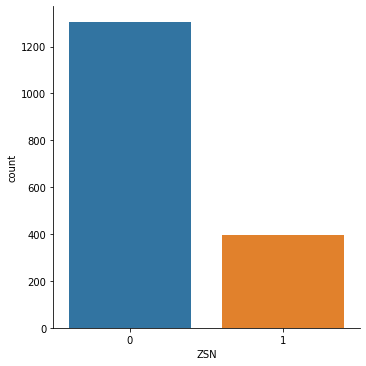

In [191]:
_ = sns.catplot(x = 'ZSN', kind = 'count', data = df)

In [192]:
somma_0 = 0
somma_1 = 0
for val in df['ZSN']:
    if val == 0:
        somma_0 = somma_0 + 1
    elif val == 1:
        somma_1 = somma_1 + 1
print(f"Number of 0: {somma_0}. Number of 1: {somma_1}")

Number of 0: 1306. Number of 1: 394


In [193]:
#quick statistical analysis of features for task 4
new_df_t4.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,61.565882,0.626471,0.553529,2.171765,1.153529,1.125882,1.385882,0.033529,2.852941,0.188235,...,0.330000,0.105882,0.078235,0.281765,0.126471,0.661765,0.707647,0.736471,0.017647,0.200588
std,12.005042,0.483883,0.836248,2.428718,1.047132,0.813751,1.090615,0.180067,3.096946,0.649065,...,0.626974,0.387368,0.341891,0.449992,0.332477,0.473248,0.454977,0.440677,0.131704,0.400558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,2.000000,0.000000,7.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,3.000000,1.000000,7.000000,4.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Features selection

In [194]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(new_df_t4, target, train_size = 0.9, random_state = 42, shuffle = False)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.8, random_state = 42, shuffle = False)

In [195]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Backward Selection
knn = KNeighborsClassifier(n_neighbors=4)
sbs = SFS(knn, 
          k_features = 40, 
          forward = False, 
          floating = False, 
          scoring = 'accuracy',
          cv = 4,
          n_jobs = -1)
sbs = sbs.fit(X_train, y_train)

print('\nSequential Backward Selection (k=40):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_) 

indices = list(sbs.k_feature_idx_)
new_columns = X_train.columns[indices]
X_train_sbs = X_train[new_columns]


Sequential Backward Selection (k=40):
(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 24, 32, 36, 40, 43, 45, 46, 55, 65, 78, 79, 81, 84, 85, 86, 87, 92, 94, 95, 97, 99)
CV Score:
0.744281045751634


In [196]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k = 40).fit(X_train, y_train)
features_chosen = X_new.get_support()
new_columns_2 = X_train[X_train.columns[features_chosen]].columns

In [197]:
s=0
for val in new_columns:
    if val in new_columns_2:
        s=s+1
s

19

In [198]:
#we choose sbs
X_train = X_train_sbs

Features correlation

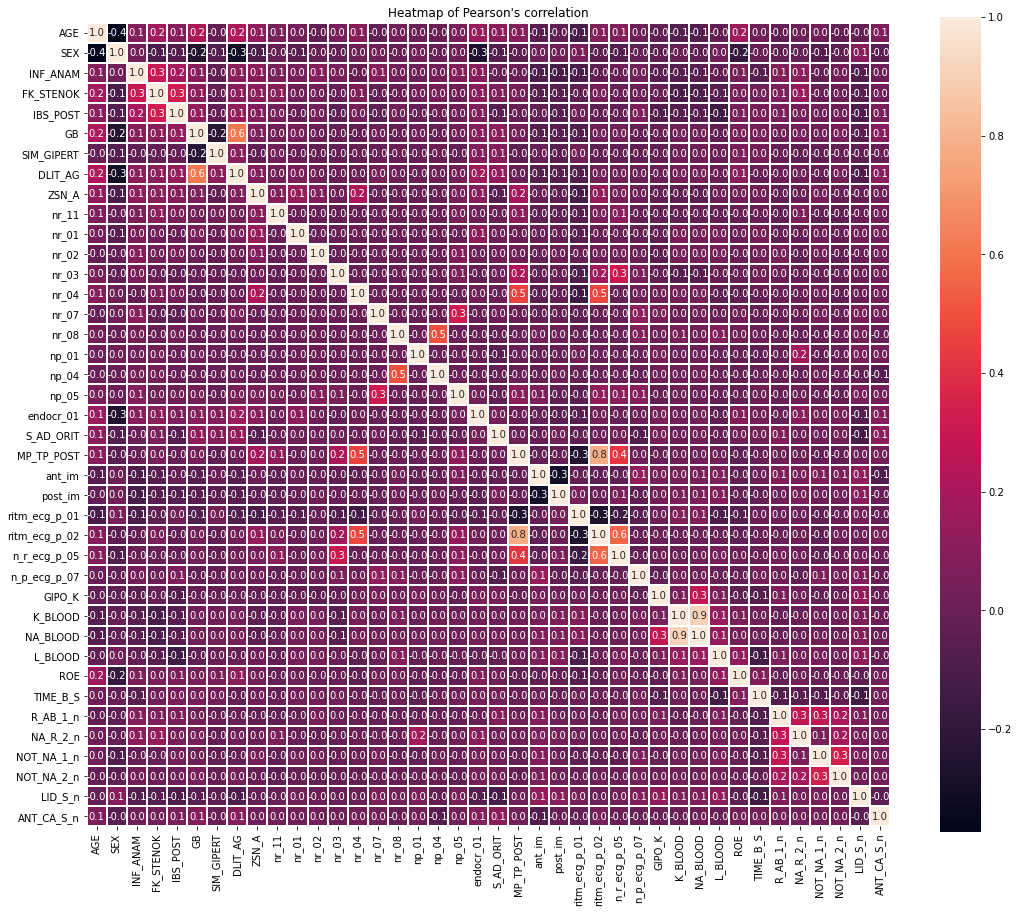

In [199]:
pc_final = X_train.corr(method = 'pearson')
fig3, ax3 = plt.subplots(figsize = (18,15))
ax3.set_title("Heatmap of Pearson's correlation")
ax3 = sns.heatmap(pc_final, linewidths = 1, annot = True, fmt = '.1f', square = True)

In [200]:
matrix = X_train.corr().abs()
#puts NaN values to the upper half and diagonal of the matrix
mask = np.triu(np.ones_like(matrix, dtype=bool))
reduced_matrix = matrix.mask(mask)
#find columns that meet the 0.80 threshold
to_drop = [c for c in reduced_matrix.columns if any(reduced_matrix[c] >= 0.8)]
print(len(to_drop))
#drop the cols
X_train = X_train.drop(to_drop, axis=1)
to_drop

1


['K_BLOOD']

In [201]:
#apply same feature selection to validation and test sets
# X_train still contains ZSN
X_valid = X_valid[X_train.columns]
X_test = X_test[X_train.columns]
X_valid.shape

(306, 39)

Outliers detection

18


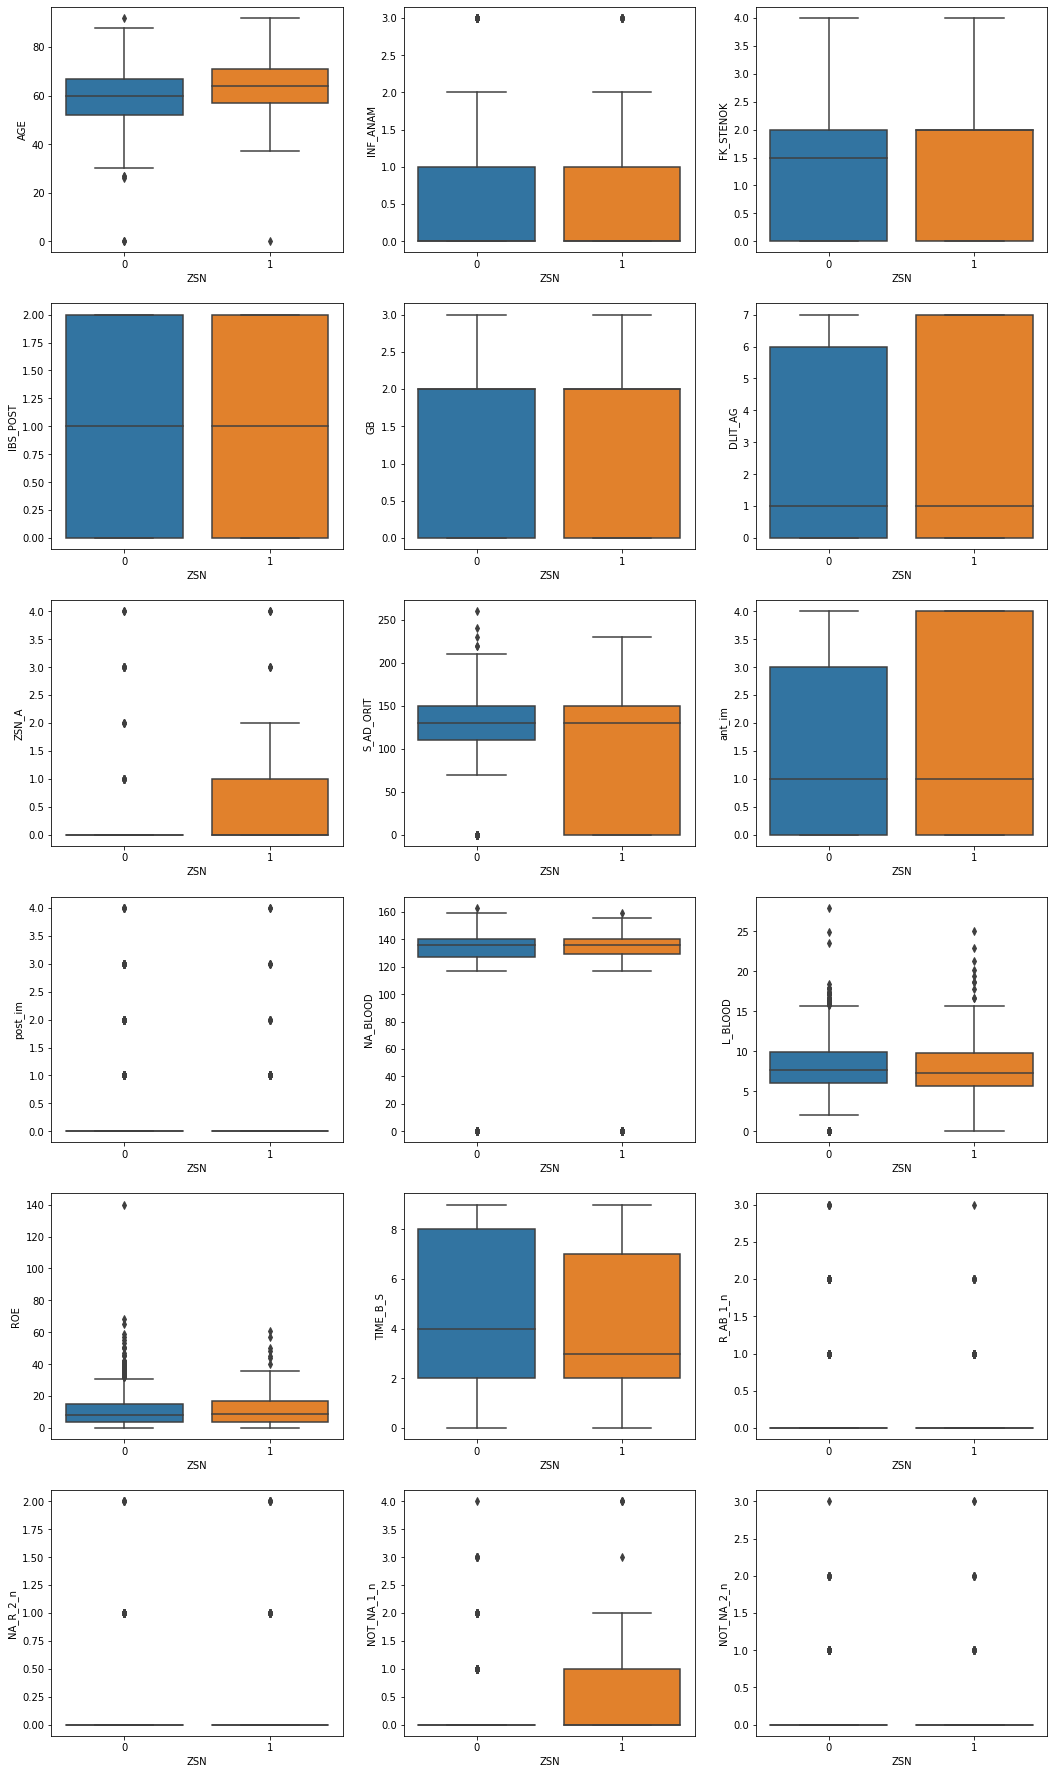

In [202]:
#boxplots
not_binary_features=[]
for col in X_train.columns:
    if X_train[col].nunique()>2:
        not_binary_features.append(col)
print(len(not_binary_features)) 

fig, positions = plt.subplots(6, 3, figsize=(15,25))
y = 0
df_non_binary = X_train[not_binary_features].copy()
df_non_binary['ZSN'] = y_train
for val in not_binary_features:
    i, j = divmod(y, 3)
    sns.boxplot(x = 'ZSN', y = val, data = df_non_binary, ax = positions[i, j])
    positions[i, j].set_ylabel(val)
    y = y + 1
fig.tight_layout(pad = 2.0)

In [203]:
#isolation forest
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state = 42).fit(X_train)
iso_forest_predictions = clf.predict(X_train)
#-1s identify outliers
outliers = 0
for val in iso_forest_predictions:
    if val == -1:
        outliers = outliers +1
print(f"Identified outliers: {outliers}.")

Identified outliers: 111.


In [204]:
#local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=2)
lof_predictions = lof.fit_predict(X_train)
#-1s identify outliers
print(lof.negative_outlier_factor_)
#the higher, the more normal
#inliers have a score close to -1
outliers = 0
for val in lof_predictions:
    if val == -1:
        outliers = outliers +1
print(f"Identified outliers: {outliers}.")

[-1.01354833 -1.05439673 -1.06173997 ... -1.17720468 -1.10268105
 -1.17663304]
Identified outliers: 41.


In [205]:
#predictions in common
(lof_predictions == iso_forest_predictions).sum()

1080

In [206]:
#one class svm
from sklearn import svm
svm = svm.OneClassSVM(nu = 0.1, kernel = "rbf", gamma = 0.1)
svm.fit(X_train)
svm_predictions = svm.predict(X_train)
#-1s identify outliers
outliers = 0
for val in svm_predictions:
    if val == -1:
        outliers = outliers +1
print(f"Identified outliers: {outliers}.")

Identified outliers: 713.


In [207]:
#z-score
X_train['ZSN'] = y_train
from scipy import stats
train_z = X_train[(np.abs(stats.zscore(X_train)) < 3).all(axis = 1)]
print(f"X_train : {len(X_train)}. train_z : {len(train_z)}.")

X_train : 1224. train_z : 831.


In [208]:
df_forest = X_train[iso_forest_predictions==1]
inliers_in_common = 0
for val in train_z.index:
    if val in df_forest.index:
        inliers_in_common = inliers_in_common +1
inliers_in_common

827

Dimensionality Reduction

0.2564443239752958


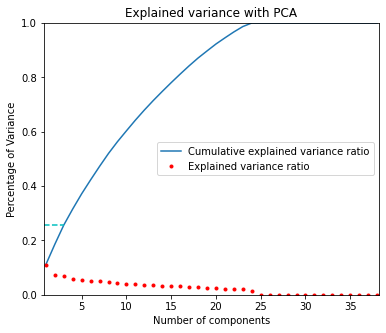

In [209]:
#PCA
#remove label before applying PCA
target = train_z['ZSN']
train_z = train_z.drop(columns = 'ZSN')

from sklearn.preprocessing import StandardScaler
features = train_z.columns
# Separating out the features
x = train_z.loc[:, features].values
# Standardizing the features
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

from sklearn.decomposition import PCA
n_c = 38
pca = PCA(n_components = n_c) 
pca.fit(x)
fig, ax = plt.subplots(figsize = (6, 5))
plt.xlabel('Number of components')
plt.ylabel('Percentage of Variance')
plt.title('Explained variance with PCA')
ax.plot(np.linspace(1, n_c, n_c), np.cumsum(pca.explained_variance_ratio_))
ax.plot(np.linspace(1, n_c, n_c), pca.explained_variance_ratio_, marker = '.', linestyle = '', color = 'r')
ax.plot([0.8, 3], [np.cumsum(pca.explained_variance_ratio_)[2], np.cumsum(pca.explained_variance_ratio_)[2]], c = 'c', linestyle = '--')
print(np.cumsum(pca.explained_variance_ratio_)[2])
ax.legend(('Cumulative explained variance ratio', 'Explained variance ratio', 'Threshold (0.9)'), loc = 7)
ax.legend(('Cumulative explained variance ratio', 'Explained variance ratio'), loc = 7)
ax.set_ylim(0,1)
ax.set_xlim(0.8, n_c + 0.2)
plt.show()

In [210]:
#25 components cover almost all the cumulative explained variance ratio
n_components_PCA = 25
pca = PCA(n_components = n_components_PCA)
train_pca = pca.fit_transform(x)
valid_pca = pca.transform(X_valid)
test_pca = pca.transform(X_test)

In [211]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)
train_lda = lda.fit(train_z, target).transform(train_z)

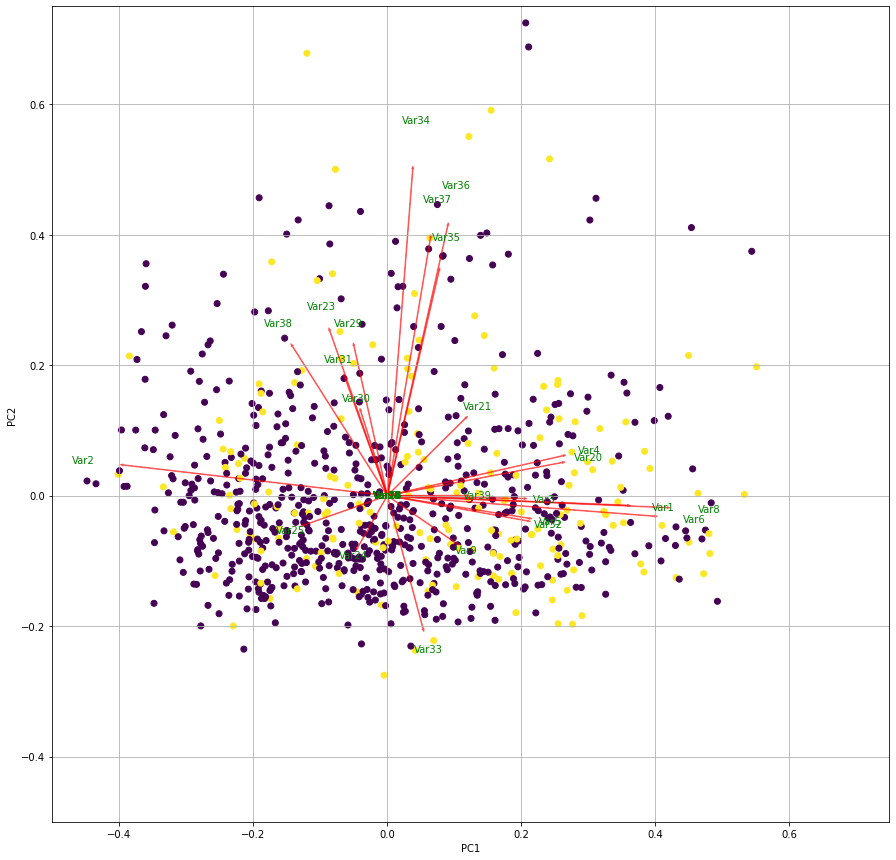

In [212]:
#BIPLOT
def biplot(score, coeff, labels = None):
    plt.figure(figsize = (15, 15))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c = target, label = target)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.5, 0.75)
    plt.ylim(-0.5, 0.75)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    
biplot(train_pca[:, 0 : 2], np.transpose(pca.components_[0 : 2, :]))
plt.show()

Rebalancing

z_train was composed of 831 rows. X_train_smote is composed of 1300 rows.


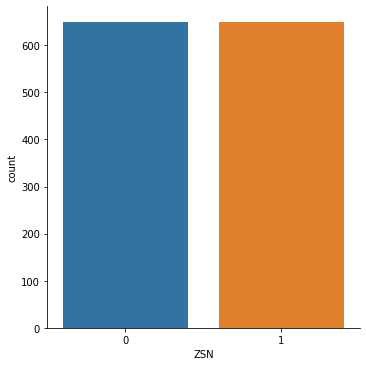

In [213]:
#SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_smote, y_train_smote = sm.fit_resample(train_z, target)
print(f"z_train was composed of {len(train_z)} rows. X_train_smote is composed of {len(X_train_smote)} rows.")
copia = X_train_smote.copy(deep = True)
copia['ZSN'] = y_train_smote
_ = sns.catplot(x = 'ZSN', kind = 'count', data = copia)

z_train was composed of 831 rows. X_train_cc is composed of 362 rows.


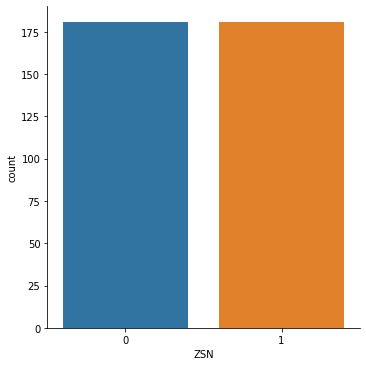

In [214]:
#cluster centroids
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state = 42)
X_train_cc, y_train_cc = cc.fit_resample(train_z, target)
print(f"z_train was composed of {len(train_z)} rows. X_train_cc is composed of {len(X_train_cc)} rows.")
copia = X_train_cc.copy(deep = True)
copia['ZSN'] = y_train_cc
_ = sns.catplot(x = 'ZSN', kind = 'count', data = copia)

Model selection

In [215]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import f1_score
svc = SVC()
svc.fit(X_train_smote, y_train_smote)
y_pred = svc.predict(X_valid)
f1_score(y_valid, y_pred)

0.3391304347826087

              precision    recall  f1-score   support

           0       0.80      0.48      0.60       238
           1       0.24      0.57      0.34        68

    accuracy                           0.50       306
   macro avg       0.52      0.53      0.47       306
weighted avg       0.67      0.50      0.54       306



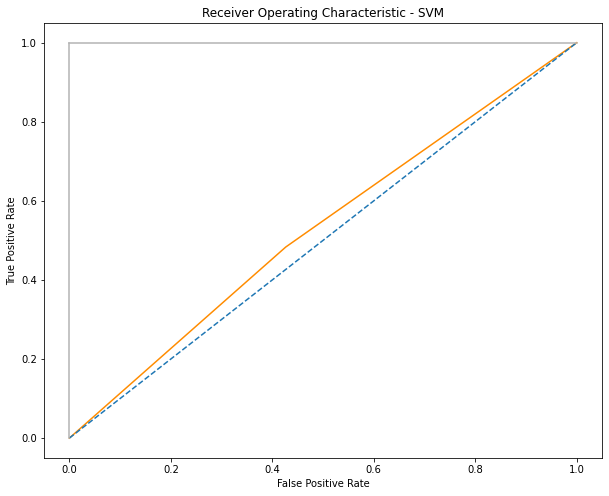

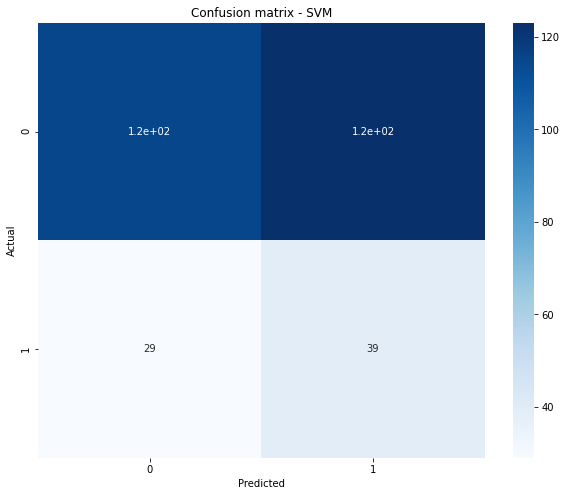

In [216]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred))

y_valid_map = []
for el in y_valid:
  if el == 1:
    y_valid_map.append(0)
  else:
    y_valid_map.append(1)
y_valid_map = np.array(y_valid_map)
y_valid_map

y_pred_map = []
for el in y_pred:
  if el == 1:
    y_pred_map.append(0)
  else:
    y_pred_map.append(1)
y_pred_map = np.array(y_pred_map)

from sklearn import metrics
from sklearn.metrics import roc_curve, auc

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_valid_map, y_pred_map)
roc_auc = auc(false_positive_rate1, true_positive_rate1)
plt.figure(figsize = (10, 8))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1,color='darkorange')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix

columns = [0,1]
confm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize = (10, 8))
plt.title('Confusion matrix - SVM')
df_cm = DataFrame(confm, index = columns, columns = columns)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
ax = sn.heatmap(df_cm, cmap = 'Blues', annot = True)
plt.show()

In [217]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train_smote, y_train_smote)
y_pred = log_reg.predict(X_valid)
f1_score(y_valid, y_pred)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.36521739130434777

              precision    recall  f1-score   support

           0       0.82      0.50      0.62       238
           1       0.26      0.62      0.37        68

    accuracy                           0.52       306
   macro avg       0.54      0.56      0.49       306
weighted avg       0.69      0.52      0.56       306



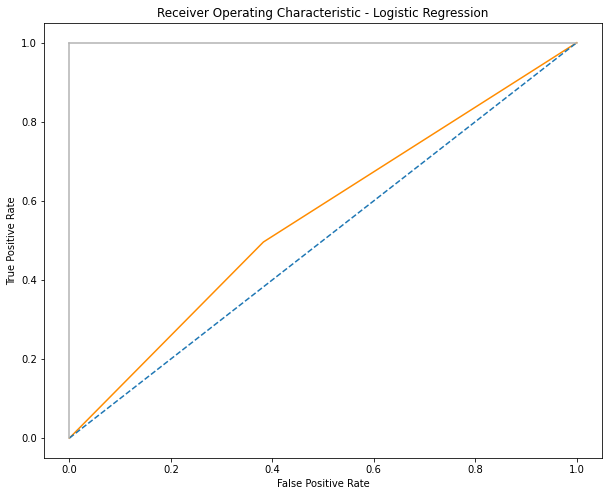

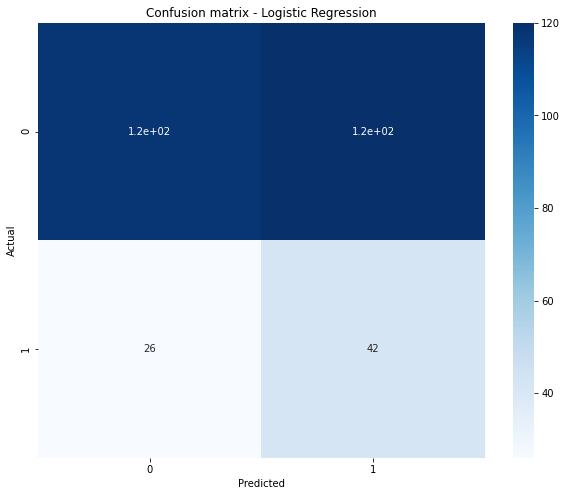

In [218]:
print(classification_report(y_valid, y_pred))

y_valid_map = []
for el in y_valid:
  if el == 1:
    y_valid_map.append(0)
  else:
    y_valid_map.append(1)
y_valid_map = np.array(y_valid_map)
y_valid_map

y_pred_map = []
for el in y_pred:
  if el == 1:
    y_pred_map.append(0)
  else:
    y_pred_map.append(1)
y_pred_map = np.array(y_pred_map)

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_valid_map, y_pred_map)
roc_auc = auc(false_positive_rate1, true_positive_rate1)
plt.figure(figsize = (10, 8))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1,color='darkorange')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

columns = [0,1]
confm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize = (10, 8))
plt.title('Confusion matrix - Logistic Regression')
df_cm = DataFrame(confm, index = columns, columns = columns)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
ax = sn.heatmap(df_cm, cmap = 'Blues', annot = True)
plt.show()

In [219]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train_smote, y_train_smote)
y_pred = tree.predict(X_valid)
f1_score(y_valid, y_pred)

0.34146341463414637

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       238
           1       0.29      0.41      0.34        68

    accuracy                           0.65       306
   macro avg       0.55      0.56      0.55       306
weighted avg       0.69      0.65      0.67       306



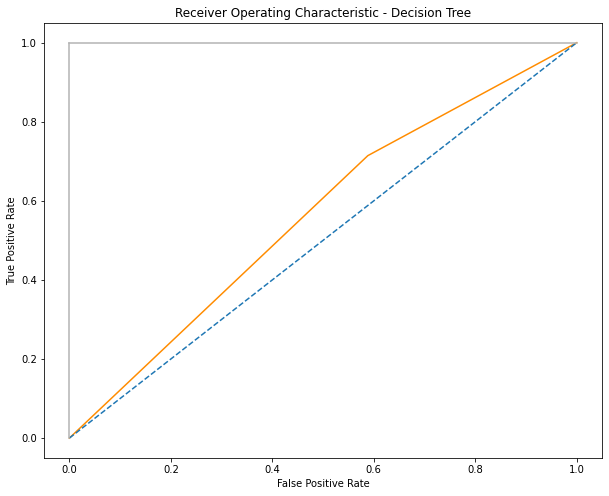

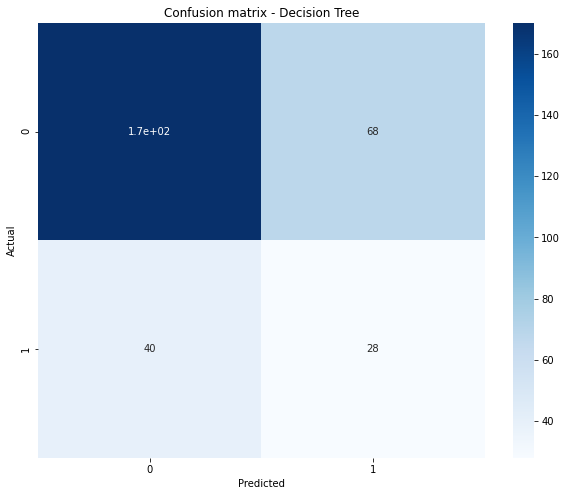

In [220]:
print(classification_report(y_valid, y_pred))

y_valid_map = []
for el in y_valid:
  if el == 1:
    y_valid_map.append(0)
  else:
    y_valid_map.append(1)
y_valid_map = np.array(y_valid_map)
y_valid_map

y_pred_map = []
for el in y_pred:
  if el == 1:
    y_pred_map.append(0)
  else:
    y_pred_map.append(1)
y_pred_map = np.array(y_pred_map)

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_valid_map, y_pred_map)
roc_auc = auc(false_positive_rate1, true_positive_rate1)
plt.figure(figsize = (10, 8))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(false_positive_rate1, true_positive_rate1,color='darkorange')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

columns = [0,1]
confm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize = (10, 8))
plt.title('Confusion matrix - Decision Tree')
df_cm = DataFrame(confm, index = columns, columns = columns)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
ax = sn.heatmap(df_cm, cmap = 'Blues', annot = True)
plt.show()

In [221]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_valid)
f1_score(y_valid, y_pred)

0.18367346938775508

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       238
           1       0.30      0.13      0.18        68

    accuracy                           0.74       306
   macro avg       0.54      0.52      0.51       306
weighted avg       0.68      0.74      0.70       306



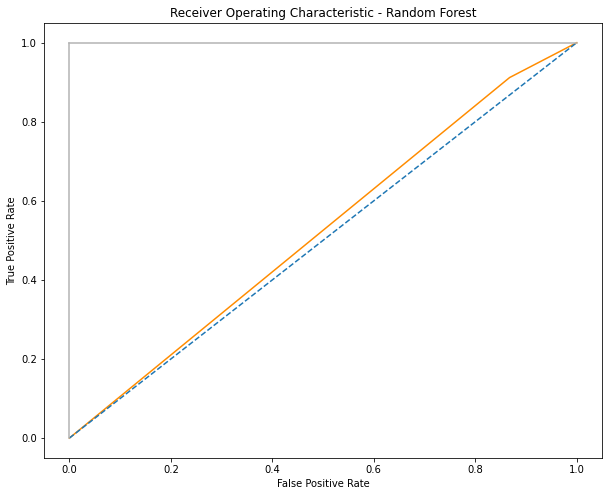

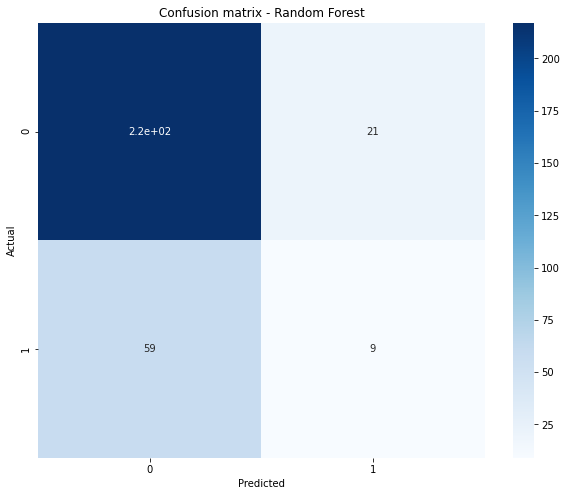

In [222]:
print(classification_report(y_valid, y_pred))

y_valid_map = []
for el in y_valid:
  if el == 1:
    y_valid_map.append(0)
  else:
    y_valid_map.append(1)
y_valid_map = np.array(y_valid_map)
y_valid_map

y_pred_map = []
for el in y_pred:
  if el == 1:
    y_pred_map.append(0)
  else:
    y_pred_map.append(1)
y_pred_map = np.array(y_pred_map)

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_valid_map, y_pred_map)
roc_auc = auc(false_positive_rate1, true_positive_rate1)
plt.figure(figsize = (10, 8))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1,color='darkorange')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

columns = [0,1]
confm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize = (10, 8))
plt.title('Confusion matrix - Random Forest')
df_cm = DataFrame(confm, index = columns, columns = columns)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
ax = sn.heatmap(df_cm, cmap = 'Blues', annot = True)
plt.show()

In [223]:
#rf with pca
rf = RandomForestClassifier(random_state = 42)
rf.fit(train_pca, target)
y_pred = rf.predict(valid_pca)
f1_score(y_valid, y_pred)

0.3529411764705882

              precision    recall  f1-score   support

           0       0.76      0.11      0.19       238
           1       0.22      0.88      0.35        68

    accuracy                           0.28       306
   macro avg       0.49      0.50      0.27       306
weighted avg       0.64      0.28      0.23       306



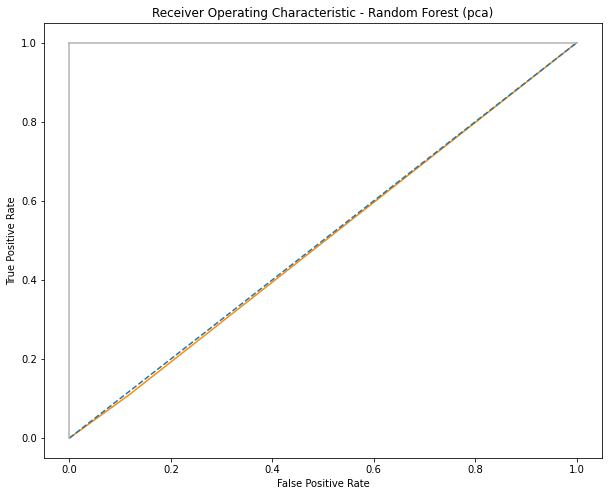

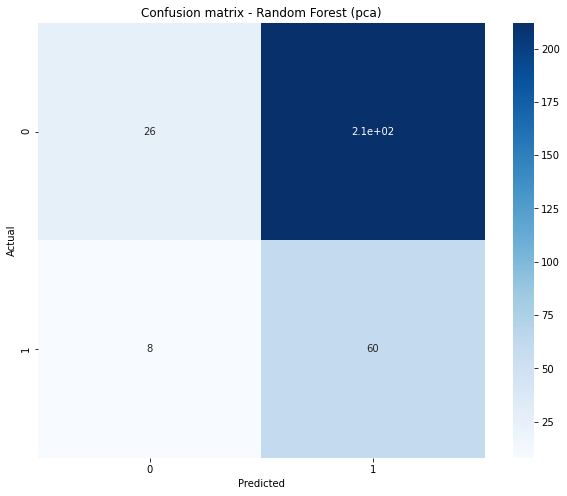

In [224]:
print(classification_report(y_valid, y_pred))

y_valid_map = []
for el in y_valid:
  if el == 1:
    y_valid_map.append(0)
  else:
    y_valid_map.append(1)
y_valid_map = np.array(y_valid_map)
y_valid_map

y_pred_map = []
for el in y_pred:
  if el == 1:
    y_pred_map.append(0)
  else:
    y_pred_map.append(1)
y_pred_map = np.array(y_pred_map)

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_valid_map, y_pred_map)
roc_auc = auc(false_positive_rate1, true_positive_rate1)
plt.figure(figsize = (10, 8))
plt.title('Receiver Operating Characteristic - Random Forest (pca)')
plt.plot(false_positive_rate1, true_positive_rate1,color='darkorange')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

columns = [0,1]
confm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize = (10, 8))
plt.title('Confusion matrix - Random Forest (pca)')
df_cm = DataFrame(confm, index = columns, columns = columns)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
ax = sn.heatmap(df_cm, cmap = 'Blues', annot = True)
plt.show()

In [225]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)
y_pred = knn.predict(X_valid)
f1_score(y_valid, y_pred)

0.3627906976744186

              precision    recall  f1-score   support

           0       0.82      0.55      0.65       238
           1       0.27      0.57      0.36        68

    accuracy                           0.55       306
   macro avg       0.54      0.56      0.51       306
weighted avg       0.69      0.55      0.59       306



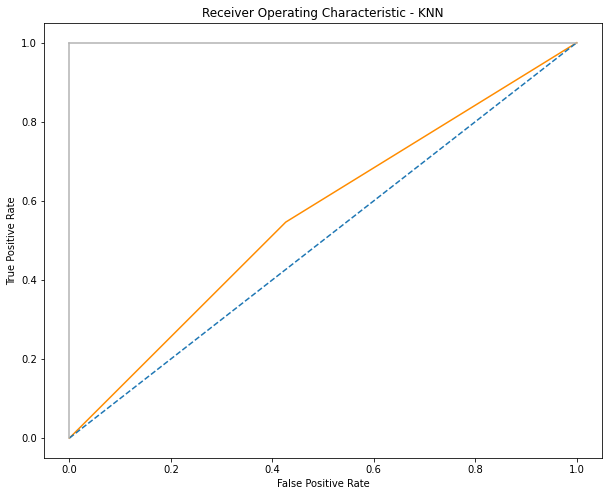

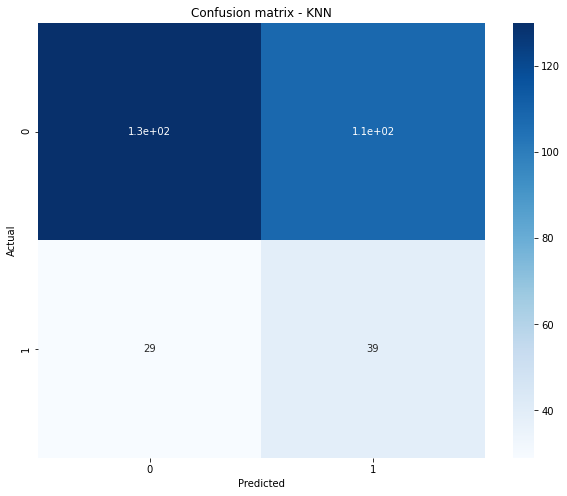

In [226]:
print(classification_report(y_valid, y_pred))

y_valid_map = []
for el in y_valid:
  if el == 1:
    y_valid_map.append(0)
  else:
    y_valid_map.append(1)
y_valid_map = np.array(y_valid_map)
y_valid_map

y_pred_map = []
for el in y_pred:
  if el == 1:
    y_pred_map.append(0)
  else:
    y_pred_map.append(1)
y_pred_map = np.array(y_pred_map)

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_valid_map, y_pred_map)
roc_auc = auc(false_positive_rate1, true_positive_rate1)
plt.figure(figsize = (10, 8))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate1, true_positive_rate1,color='darkorange')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

columns = [0,1]
confm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize = (10, 8))
plt.title('Confusion matrix - KNN')

#fig, ax2 = plt.subplots(figsize=(8,7))
df_cm = DataFrame(confm, index=columns, columns=columns)

df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

ax = sn.heatmap(df_cm, cmap='Blues', annot=True)

plt.show()

Hyperparameters tuning

[0.35579515 0.3715847  0.09876543 0.10638298 0.3030303  0.04878049
 0.15238095 0.35795455 0.         0.35654596 0.2173913  0.02272727
 0.36216216 0.         0.35223881 0.10810811 0.15517241 0.25
 0.36158192 0.32198142]


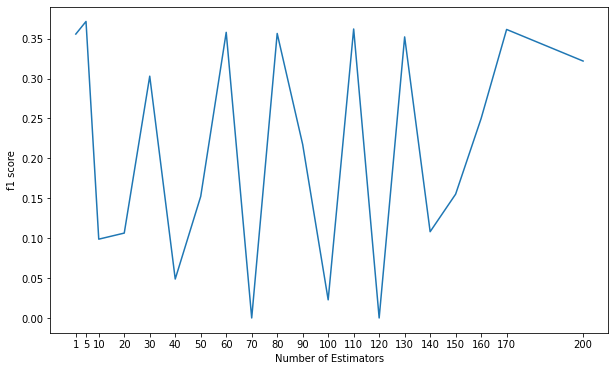

In [227]:
#Random forest tuning
mean_f1 = np.zeros(20)
j = 0
for i in [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 200]:
    #Train Model and Predict  
    rf = RandomForestClassifier(n_estimators = i).fit(train_pca, target)
    y_pred= rf.predict(valid_pca)
    mean_f1[j] = f1_score(y_valid, y_pred)
    j = j + 1
print(mean_f1)
loc = np.array([1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 200])
plt.figure(figsize = (10, 6))
plt.plot([1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 200], mean_f1)
plt.xticks(loc)
plt.xlabel('Number of Estimators')
plt.ylabel('f1 score')
plt.show()

In [228]:
#Logistic Regression tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
mean_f1 = np.zeros(7)
j = 0
for i in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    #Train Model and Predict  
    lr = LogisticRegression(C = i).fit(X_train_smote, y_train_smote)
    y_pred= lr.predict(X_valid)
    mean_f1[j] = f1_score(y_valid, y_pred)
    j = j + 1
print(mean_f1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

[0.3373494  0.36885246 0.37068966 0.36521739 0.39004149 0.37130802
 0.37344398]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

In [229]:
#a better hyperparameter tuning can be done with more time

Test the model on test set

In [230]:
#the best is Logistic Regression
#let's see how it performs on test set
#merge train and valid
X_valid['ZSN'] = y_valid
X_final = pd.concat([X_train, X_valid], ignore_index = False, axis = 0)
#apply z score
final_z = X_final[(np.abs(stats.zscore(X_final)) < 3).all(axis = 1)]
final_target = final_z['ZSN']
final_z = final_z.drop(columns = 'ZSN')
#smote
final_smote, target_smote = sm.fit_resample(final_z, final_target)
#train the model
log_reg = LogisticRegression(C = 100, random_state = 42)
log_reg.fit(final_smote, target_smote)
y_pred = log_reg.predict(X_test)
f1_score(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.24793388429752064

In [231]:
#Random forest classifier
#merge train and valid pca
train_pca = pd.DataFrame(train_pca)
valid_pca = pd.DataFrame(valid_pca)
train_pca['ZSN'] = target
valid_pca['ZSN'] = y_valid
final_pca = pd.concat([train_pca, valid_pca])
target_pca = final_pca['ZSN']
final_pca = final_pca.drop(columns = 'ZSN')
#train the model
rf = RandomForestClassifier(random_state = 42)
rf.fit(train_pca.drop(columns = 'ZSN'), target)
y_pred = rf.predict(test_pca)
f1_score(y_test, y_pred)

0.23312883435582818